# Objectives
---
Here, our objective is to predict how much insurance charges will be charged by a client. For insurance companies, to predict the appropriate charges is beneficial to attract healthy clients by adjusting insurance fees individually and for new clients, accurate prediction improves their customer satisfactions unless their healthy risks are high.

# Dataset

American insurance company's data<br>
References: https://www.kaggle.com/mirichoi0218/insurance <br><br>
<br><br>

**Datasets**

- `age`: age of primary beneficiary
- `sex`: insurance contractor gender, female, male
- `bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m^2) using the ratio of height to weight, ideally 18.5 to 24.9
- `children`: Number of children covered by health insurance / Number of dependents
- `smoker`: Smoking
- `region`: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- `charges`: Individual medical costs billed by health insurance

# Strategy
---

 - Objectives: To predict the charges by using client information.
 - Dependent variables: `charges`
 - Independent variables: `age`, `sex`, `bmi`, `children`, `smoker`, `region`
 - Regression models: Random Forest, XGB, LightGBM

# Libraries
---

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
import pickle

from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.simplefilter('ignore')

path="/content/drive/My Drive/yuzy_portfolio/yuzy_portfolio/Machine_Learning/data"

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Check the data
---

## `.read_csv()`

In [2]:
data = pd.read_csv(path+"/01_raw/insurance.csv", engine='python', encoding='utf-8', index_col="id")

## `.shape`

In [3]:
data.shape

(1338, 7)

## `.columns`

In [4]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## `.dtypes`

In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## `.info()`

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1 to 1338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


## `.value_counts()`

In [7]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [9]:
data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

## `.head()` `.tail()`

In [10]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
id,,,,,,,
1,19,female,27.900,0,yes,southwest,16884.92400
2,18,male,33.770,1,no,southeast,1725.55230
3,28,male,33.000,3,no,southeast,4449.46200
4,33,male,22.705,0,no,northwest,21984.47061
5,32,male,28.880,0,no,northwest,3866.85520
6,31,female,25.740,0,no,southeast,3756.62160
7,46,female,33.440,1,no,southeast,8240.58960
8,37,female,27.740,3,no,northwest,7281.50560
9,37,male,29.830,2,no,northeast,6406.41070


In [11]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
id,,,,,,,
1334,50,male,30.97,3,no,northwest,10600.5483
1335,18,female,31.92,0,no,northeast,2205.9808
1336,18,female,36.85,0,no,southeast,1629.8335
1337,21,female,25.80,0,no,southwest,2007.9450
1338,61,female,29.07,0,yes,northwest,29141.3603


## Descriptive statistics

In [12]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Distribution and Correlation of variables

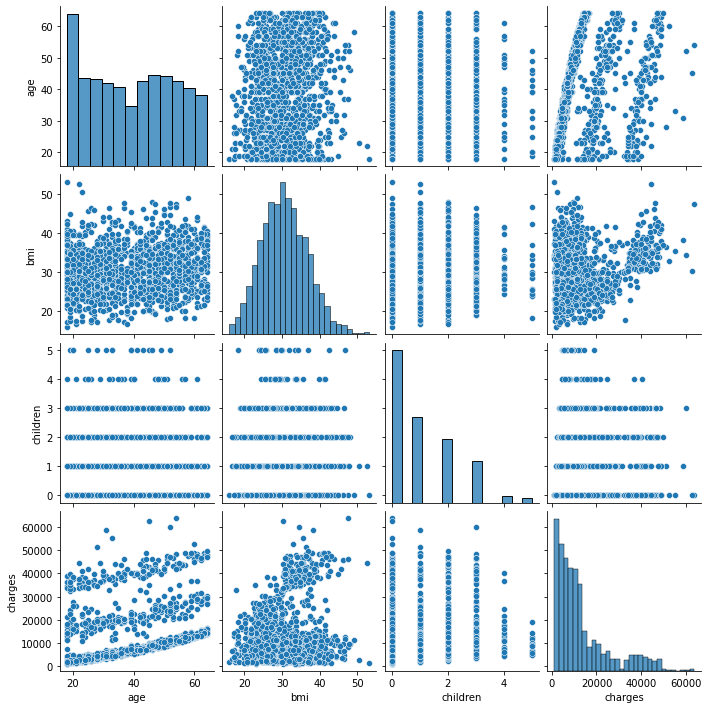

In [13]:
g = sns.pairplot(data)

## Missing values

In [14]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Preprocess the data
---

## Chenge object to numerical

### categorical values

In [15]:
data["sex"] = data["sex"].replace({"male":1, "female":0})

In [16]:
data["smoker"] = data["smoker"].replace({"no":0, "yes":1})

### multi-categorical values

In [17]:
data_region = pd.get_dummies(data["region"], sparse=False)
df = pd.concat([data, data_region], axis=1)
df = df.drop("region", axis=1)

In [18]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
id,,,,,,,,,,
1,19,0,27.900,0,1,16884.92400,0,0,0,1
2,18,1,33.770,1,0,1725.55230,0,0,1,0
3,28,1,33.000,3,0,4449.46200,0,0,1,0
4,33,1,22.705,0,0,21984.47061,0,1,0,0
5,32,1,28.880,0,0,3866.85520,0,1,0,0


## Recheck the dist and corr

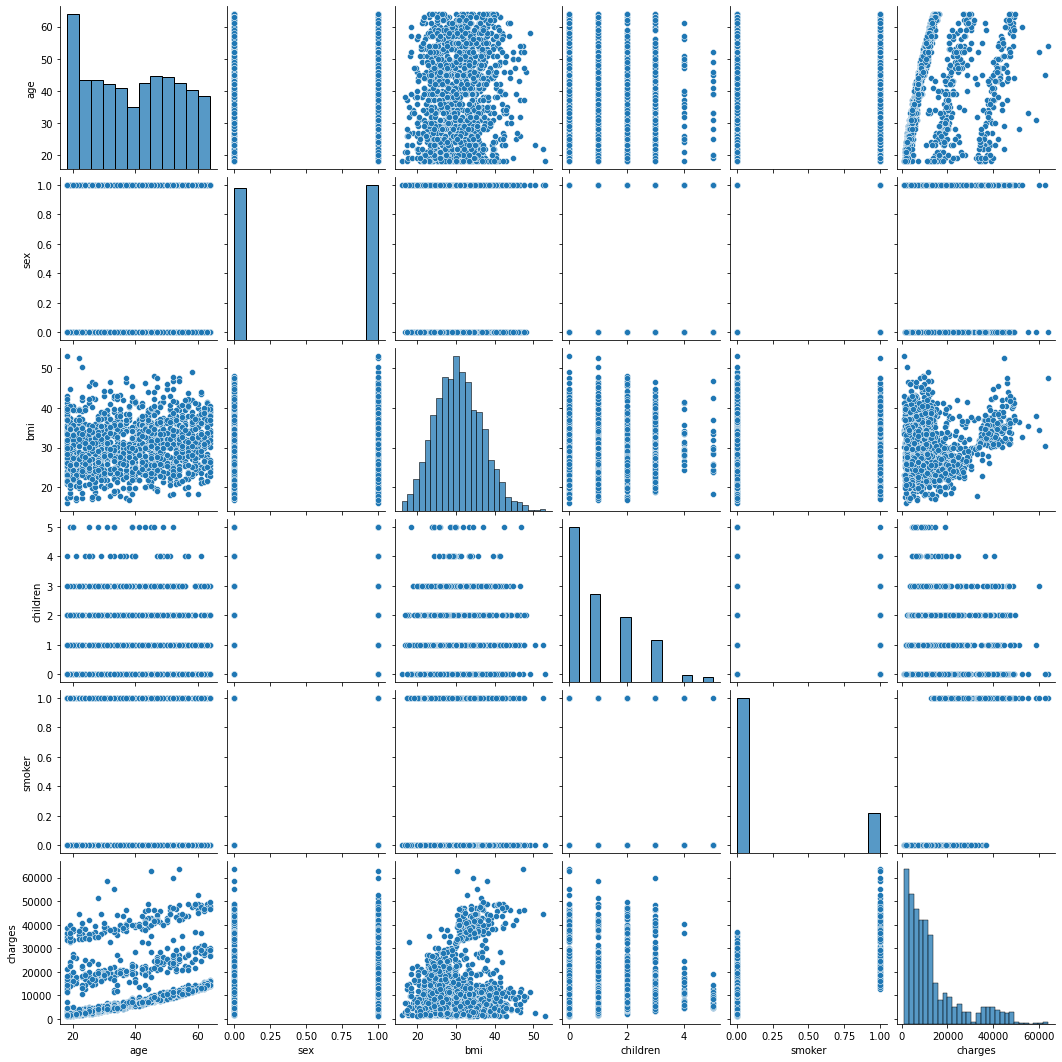

In [19]:
sns.pairplot(df.drop(["northeast", "northwest", "southeast", "southwest"], axis=1))

See the outliers in `charges`. Not many customers will charge more than 40000 USD.

In [20]:
df.to_pickle(path+"/03_primary/mastertable_insurance.pickle")

# Regression models

## Split the data

`train_test_split()`

In [21]:
y_reg_target = df['charges']

In [22]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

In [23]:
X_reg_explanatory = df.drop(["charges"], axis=1)

In [24]:
X_train,X_test,y_train, y_test = train_test_split(X_reg_explanatory, y_reg_target, random_state=1, test_size=0.2)

In [25]:
len(X_train), len(X_test)

(1070, 268)

In [26]:
len(y_train),len(y_test)

(1070, 268)

Check the distributions of train and test data are equal.

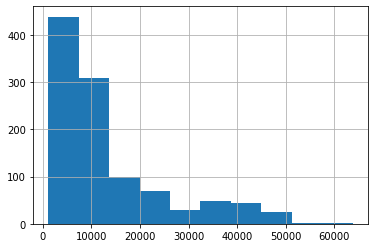

In [27]:
y_train.hist()

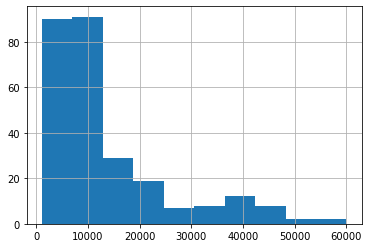

In [28]:
y_test.hist()

Not so different. Good.

## Base models

### Random Forest
`RandomForestRegressor()`

In [29]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### XGB
`xgb.XGBRegressor()`

In [30]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)

[19:30:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### LightGBM

`lgb.LGBMRegressor()`

In [31]:
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Prediction
---

 `.predict()`

### RF

In [32]:
rf_pred = rf_model.predict(X_test)
rf_pred

array([ 1615.536363  , 11964.2021089 ,  9744.3974229 , 10649.0285734 ,
        2128.1233735 , 40578.2376186 ,  9838.3085035 , 11623.7596245 ,
        3635.6576055 , 20431.9945683 , 17504.829104  , 11931.8651219 ,
        6845.6749913 ,  7038.080908  ,  1271.9454395 , 11492.775925  ,
        5405.6786056 ,  7166.2564233 , 16503.3341607 , 13478.525259  ,
       12167.0453962 , 40967.3774407 , 12500.5949035 , 12539.3239751 ,
       15041.52499176,  6602.783983  , 12430.6744515 , 10736.866911  ,
        7494.3636466 ,  4388.3212346 , 12399.3703088 ,  7346.3649793 ,
       27449.4931925 , 34997.77958   , 25916.4862934 , 12665.8816007 ,
       39686.9800185 , 17255.9948212 , 14250.4953973 , 44567.7288232 ,
        5486.761648  , 11815.8042745 , 11529.0823473 , 19945.0248063 ,
        6373.0258248 , 12927.6753357 ,  1778.152895  , 38341.2606738 ,
       10076.4077848 , 17120.9088889 , 15187.8964731 , 16145.8751706 ,
        5920.5061779 , 10905.7984629 , 17538.0514355 ,  5855.0074517 ,
      

### XGB

In [33]:
xgb_pred = xgb_model.predict(X_test)
xgb_pred

array([ 2894.9204, 12424.313 ,  9843.631 , 11526.578 ,  2630.2908,
       38373.77  , 11403.964 , 12464.963 ,  4553.357 , 20454.81  ,
       16370.415 , 12842.689 ,  7205.836 ,  7237.8047,  2308.025 ,
       11338.588 ,  4929.254 ,  7770.684 , 14683.956 , 14545.167 ,
       12714.569 , 40815.465 ,  9359.895 ,  9786.395 ,  4654.318 ,
        7428.0635,  9744.703 , 10248.283 ,  6554.1934,  5105.904 ,
       13740.575 ,  7035.6084, 24417.676 , 34300.32  , 23788.184 ,
       12220.078 , 39512.227 , 17085.133 , 12869.763 , 42144.203 ,
        6590.4805, 12286.952 , 12282.667 , 15386.277 ,  6331.1094,
       13994.213 ,  3185.8755, 37530.74  , 10660.525 , 17658.803 ,
       14198.063 , 16298.282 ,  4280.7505,  9393.557 , 17103.096 ,
        4687.9595, 42018.02  , 14314.892 ,  7324.7935,  1863.8794,
        4635.7227, 14417.994 , 20071.398 ,  4423.892 , 14276.269 ,
       11011.432 , 11636.397 , 12445.383 ,  4279.9404, 16300.382 ,
       43374.797 , 41981.223 ,  2906.8005, 15967.738 , 14383.4

### LightGBM

In [34]:
lgb_pred = lgb_model.predict(X_test)
lgb_pred

array([ 2938.54540714, 11476.17167869,  9536.70780959,  9621.00925173,
        2732.33238575, 38816.24205832, 11636.21544849, 11804.37623174,
        2809.97352391, 20428.33268163, 16539.69340003, 14016.42825073,
        6447.3406747 ,  7538.77197061,  1752.81351993,  9586.10245726,
        4698.60447405,  7085.65002484, 15256.642486  , 14285.06206724,
       10829.62894818, 43282.34433342, 10623.62459187, 10850.78449142,
        9484.53333411,  6446.87318885,  9309.89310354,  8508.31514532,
        5695.44582151,  1713.91692586, 12308.16252422,  5919.98378006,
       23616.99676762, 32969.96596727, 22662.59468621, 12804.92272481,
       38060.47481552, 16754.85798664, 12357.45960397, 45877.37490575,
        5649.20163928, 11380.67561785, 11897.27334073, 18701.31359943,
        5831.68519418, 13155.01694628,   843.03121494, 38271.45580029,
        9613.95636133, 14619.62366088, 18287.33796216, 15285.29295532,
        5562.22398277,  8450.03387797, 18207.88252678,  5578.7486401 ,
      

## Accuracy
---

### RF

In [35]:
# RMSE and MAE
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
mae_rf = mean_absolute_error(y_test, rf_pred)

print("RMSE:", rmse_rf)
print("MAE:", mae_rf)

RMSE: 4706.987511260204
MAE: 2665.046422455037


In [36]:
# R2 score
r2_rf = r2_score(y_test, rf_pred)
r2_rf

0.8515833567633494

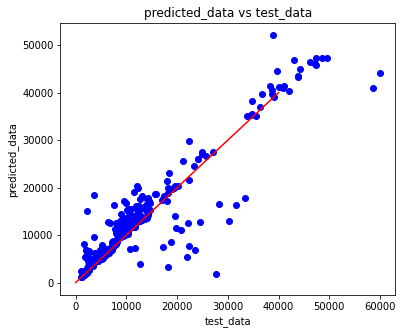

In [37]:
# Scatter plot
fig = plt.figure(figsize=(6,5))

plt.scatter(y_test,rf_pred,color="blue")
x = np.arange(0, 40000)
plt.plot(x,x,color="red")
plt.title("predicted_data vs test_data")
plt.xlabel("test_data")
plt.ylabel("predicted_data")
plt.show()

Some data seem to deviate from the red line.

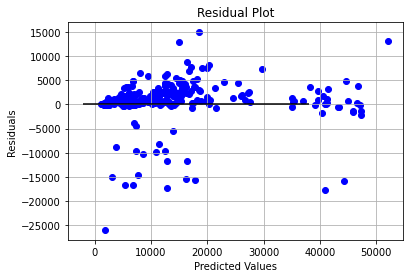

In [38]:
# Residual plots
plt.scatter(rf_pred, rf_pred - y_test, color = 'blue')      # Plot the residuals
plt.hlines(y = 0, xmin = -2000, xmax = 38000, color = 'black') # x-axis
plt.title('Residual Plot')                                # Title
plt.xlabel('Predicted Values')                            # x-label
plt.ylabel('Residuals')                                   # y-label
plt.grid()                                                # grid-line

plt.show()                                               # Display 

It looks messed up.

### XGB

In [39]:
# RMSE and MAE
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_pred))
mae_xgb = mean_absolute_error(y_test, xgb_pred)

print("RMSE:", rmse_xgb)
print("MAE:", mae_xgb)

RMSE: 4236.691353202727
MAE: 2317.3588197933186


In [40]:
# R2 score
r2_xgb = r2_score(y_test, xgb_pred)
r2_xgb

0.8797596683054297

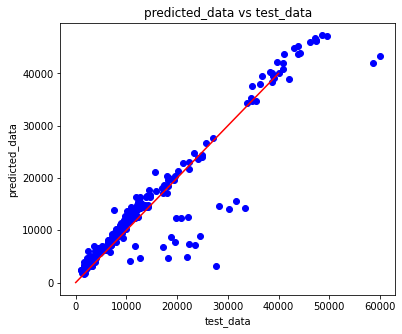

In [41]:
# Scatter plot
fig = plt.figure(figsize=(6,5))

plt.scatter(y_test,xgb_pred,color="blue")
x = np.arange(0, 40000)
plt.plot(x,x,color="red")
plt.title("predicted_data vs test_data")
plt.xlabel("test_data")
plt.ylabel("predicted_data")

plt.show()


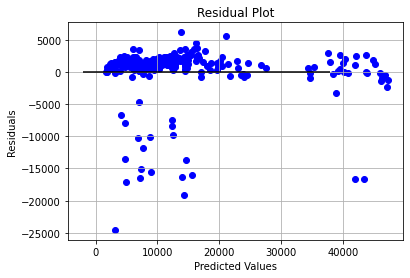

In [42]:
# residual plot
plt.scatter(xgb_pred, xgb_pred - y_test, color = 'blue')   
plt.hlines(y = 0, xmin = -2000, xmax = 38000, color = 'black') 
plt.title('Residual Plot')                                
plt.xlabel('Predicted Values')                            
plt.ylabel('Residuals')                                   
plt.grid()                                                

plt.show()                                              

### LightGBM

In [43]:
# RMSE and MAE
rmse_lgb = np.sqrt(mean_squared_error(y_test, lgb_pred))
mae_lgb = mean_absolute_error(y_test, lgb_pred)

print("RMSE:", rmse_lgb)
print("MAE:", mae_lgb)

RMSE: 4526.929874412698
MAE: 2618.474608937722


In [44]:
# R2 score
r2_lgb = r2_score(y_test, lgb_pred)
r2_lgb

0.8627210190057628

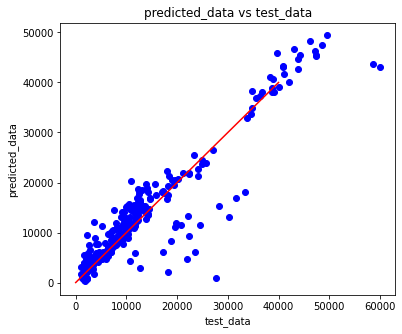

In [45]:
# Scatter plot
fig = plt.figure(figsize=(6,5))

plt.scatter(y_test,lgb_pred,color="blue")
x = np.arange(0, 40000)
plt.plot(x,x,color="red")
plt.title("predicted_data vs test_data")
plt.xlabel("test_data")
plt.ylabel("predicted_data")

plt.show()


It looks better than the other above results.

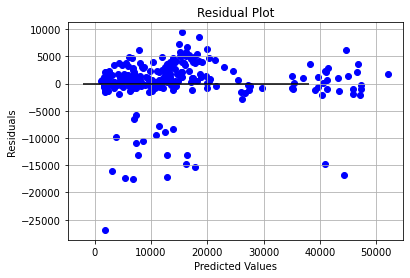

In [46]:
# Residual plot
plt.scatter(rf_pred, lgb_pred - y_test, color = 'blue')      
plt.hlines(y = 0, xmin = -2000, xmax = 38000, color = 'black') 
plt.title('Residual Plot')                                
plt.xlabel('Predicted Values')                            
plt.ylabel('Residuals')                                   
plt.grid()                                                

plt.show()                                               

The residual is often negative.

## Parameter tunings

### RF

In [47]:
# Default
rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### Grid Search

In [48]:
# # #Grid_Search
# params = {
#        'n_estimators'      : [50,100,150],
#        'random_state'      : [1],
#        'n_jobs'            : [-1],
#        'min_samples_split' : [5, 10, 15],
#        'max_depth'         : [3,4,5,6,7],
#        'max_leaf_nodes'    : [15, 20, 25]
# }
# grid_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=1), param_grid=params, \
#                        cv = 10, scoring = 'r2')
# grid_rf.fit(X_train, y_train)
# print(grid_rf.best_estimator_)

In [49]:
# Best estimator
grid_rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=20,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

#### Fitting

In [50]:
grid_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=20,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

#### Prediction

In [51]:
grid_rf_pred = grid_rf.predict(X_test)

#### Accuracy

In [52]:
# RMSE and MAE
grid_rf_rmse = np.sqrt(mean_squared_error(y_test, grid_rf_pred))
grid_rf_mae = mean_absolute_error(y_test, grid_rf_pred)

print("RMSE:", grid_rf_rmse)
print("MAE:", grid_rf_mae)

RMSE: 4329.140271091672
MAE: 2439.6461185881826


In [53]:
# R2 score
r2_grid_rf = r2_score(y_test, grid_rf_pred)
r2_grid_rf

0.8744548821888043

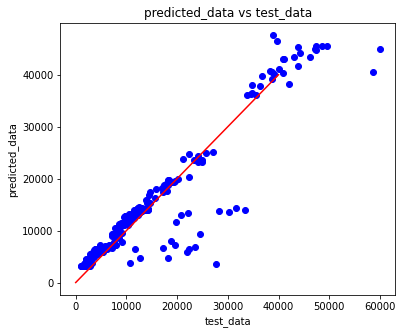

In [54]:
# Scatter plot
fig = plt.figure(figsize=(6,5))

plt.scatter(y_test,grid_rf_pred,color="blue")
x = np.arange(0, 40000)
plt.plot(x,x,color="red")
plt.title("predicted_data vs test_data")
plt.xlabel("test_data")
plt.ylabel("predicted_data")

plt.show()


Improved than the base model

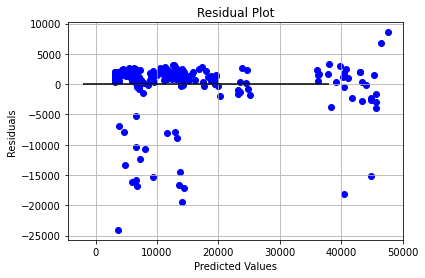

In [55]:
# Residual plot
plt.scatter(grid_rf_pred, grid_rf_pred - y_test, color = 'blue')      
plt.hlines(y = 0, xmin = -2000, xmax = 38000, color = 'black') 
plt.title('Residual Plot')                                
plt.xlabel('Predicted Values')                            
plt.ylabel('Residuals')                                   
plt.grid()                                                

plt.show()                                              

The residuals still have the pattern biased to negative.

### XGB

In [56]:
# Default
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

#### Grid Search

In [57]:
# # #Grid_Search
# params = {
#        'n_estimators'      : [30,40,50],
#        'random_state'      : [1],
#        'n_jobs'            : [-1],
#        'min_samples_split' : [3, 5, 7],
#        'max_depth'         : [3,4,5,6,7],
#        'max_leaf_nodes'    : [3, 5, 7]
# }

# grid_xgb = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1), param_grid=params, \
#                        cv = 10, scoring = 'r2')
# grid_xgb.fit(X_train, y_train)
# print(grid_xgb.best_estimator_)

In [58]:
# Best estimator
grid_xgb = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, max_leaf_nodes=3, min_child_weight=1,
             min_samples_split=3, missing=None, n_estimators=40, n_jobs=-1,
             nthread=None, objective='reg:linear', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

#### Fitting

In [59]:
grid_xgb.fit(X_train,y_train)

[19:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, max_leaf_nodes=3, min_child_weight=1,
             min_samples_split=3, missing=None, n_estimators=40, n_jobs=-1,
             nthread=None, objective='reg:linear', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

#### Prediction

In [60]:
grid_xgb_pred = grid_xgb.predict(X_test)

#### Accuracy

In [61]:
# RMSE and MAE
grid_xgb_rmse = np.sqrt(mean_squared_error(y_test, grid_xgb_pred))
grid_xgb_mae = mean_absolute_error(y_test, grid_xgb_pred)

print("RMSE:", grid_xgb_rmse)
print("MAE:", grid_xgb_mae)

RMSE: 4239.586014604071
MAE: 2253.021974989506


In [62]:
# Check R2 score
r2_grid_xgb = r2_score(y_test, grid_xgb_pred)
r2_grid_xgb

0.8795953070527733

The parameter turning improved the performance of prediction!!

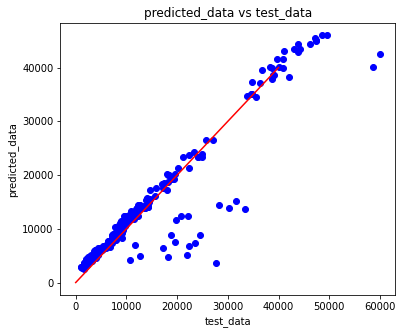

In [63]:
# Scatter plot
fig = plt.figure(figsize=(6,5))

plt.scatter(y_test,grid_xgb_pred,color="blue")
x = np.arange(0, 40000)
plt.plot(x,x,color="red")
plt.title("predicted_data vs test_data")
plt.xlabel("test_data")
plt.ylabel("predicted_data")

plt.show()


Generally the predicted values follow the red line.

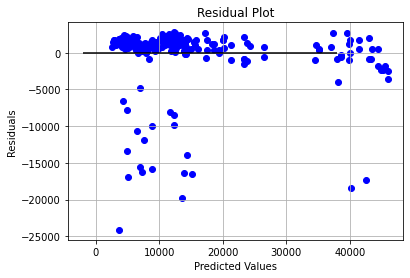

In [64]:
# Residual plot
plt.scatter(grid_xgb_pred, grid_xgb_pred - y_test, color = 'blue')     
plt.hlines(y = 0, xmin = -2000, xmax = 38000, color = 'black') 
plt.title('Residual Plot')                                
plt.xlabel('Predicted Values')                            
plt.ylabel('Residuals')                                   
plt.grid()                                                

plt.show()                                               

### LightGBM

In [65]:
# Default
lgb_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#### Grid Search

In [66]:
## #Grid_Search
# params = {
#        'n_estimators'      : [40,45,50],
#        'random_state'      : [1],
#        'n_jobs'            : [-1],
#        'max_depth'         : [2,3,4],
#        'num_leaves'    : [5,10,15]
# }

# grid_lgb = GridSearchCV(estimator=lgb.LGBMRegressor(random_state=1), param_grid=params, \
#                        cv = 10, scoring = 'r2')
# grid_lgb.fit(X_train, y_train)
# print(grid_lgb.best_estimator_)

In [67]:
# Best estimator
grid_lgb = lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=3,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=45, n_jobs=-1, num_leaves=10, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#### Fitting

In [68]:
grid_lgb.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=3,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=45, n_jobs=-1, num_leaves=10, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#### Prediction

In [69]:
grid_lgb_pred = grid_lgb.predict(X_test)

#### Accuracy

In [70]:
# RMSE and MAE
grid_lgb_rmse = np.sqrt(mean_squared_error(y_test, grid_lgb_pred))
grid_lgb_mae = mean_absolute_error(y_test, grid_lgb_pred)

print("RMSE:", grid_lgb_rmse)
print("MAE:", grid_lgb_mae)

RMSE: 4198.114270183001
MAE: 2329.398347554613


In [71]:
# Check R2 score
r2_grid_lgb = r2_score(y_test, grid_lgb_pred)
r2_grid_lgb

0.8819393896520046

R2 score increased by 2% compared with that of the base model.

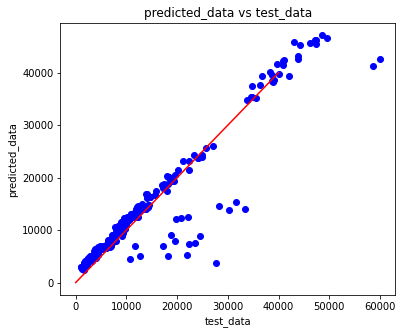

In [72]:
# Scatter plot
fig = plt.figure(figsize=(6,5))

plt.scatter(y_test,grid_lgb_pred,color="blue")
x = np.arange(0, 40000)
plt.plot(x,x,color="red")
plt.title("predicted_data vs test_data")
plt.xlabel("test_data")
plt.ylabel("predicted_data")

plt.show()


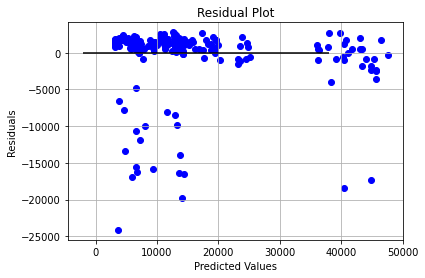

In [73]:
# Residual plot
plt.scatter(grid_rf_pred, grid_xgb_pred - y_test, color = 'blue')       
plt.hlines(y = 0, xmin = -2000, xmax = 38000, color = 'black') 
plt.title('Residual Plot')                              
plt.xlabel('Predicted Values')                            
plt.ylabel('Residuals')                                   
plt.grid()                                                
plt.show()                                               

## Interpretation

### Features Importance

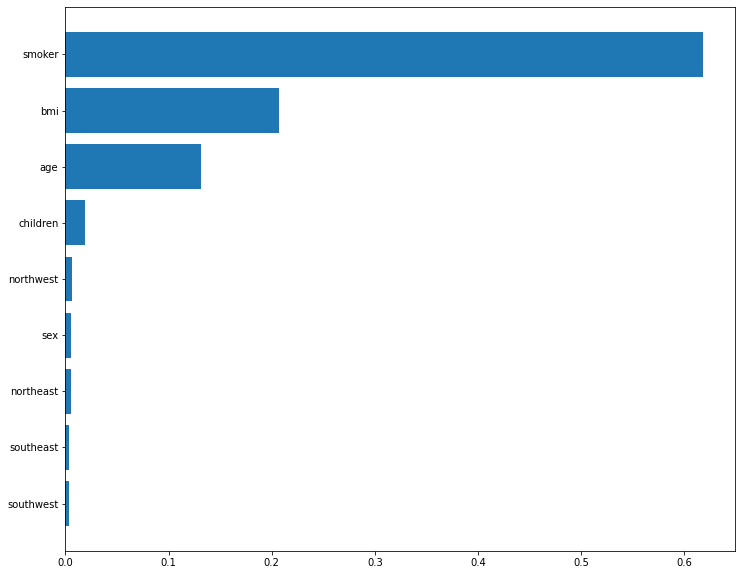

In [74]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.barh(range(len(indices)), importances[indices],  align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

`bmi` `age` `smoker` seem to be quite important.

### Summary

Regression task：
- The most accurate model：LightGBM
- Accuracy：R2 score 88%

### The work left to be done

We can do the below things to improve our work!
1. How are the models improved more?
2. What kind of new experiments will be valuable?

1.
 - Check the outliers in the existing experiment
 - Parameter tuning should be more done?
 - features engineering?
 
2.
 - More variables, more data points
 - Acquire more domain knowledge

## New case

Assume there is a new client applying for the contract.

### Profile

In [75]:
Obama = pd.DataFrame({"id":10000, "age":58, "sex":1, "bmi":22, "children":2, "smoker":1,
                           "northeast":1, "northwest":0, "southeast":0, "southwest":0}, index=[0])
Obama = Obama.set_index("id")

In [76]:
Obama

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
id,,,,,,,,,
10000,58,1,22,2,1,1,0,0,0


### Prediction with LightGBM

In [77]:
lgb_Obama = lgb_model.predict(Obama)
lgb_Obama

array([21948.69240136])

Well, Mr.Obama may charge the insurance fee about 22000 USD.